In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("data.csv")
X = data.loc[:,('Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity', 'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory', 'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis', 'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF')]
y = data['Type']
print("Label kelas : ", np.unique(y))

Label kelas :  ['Basilar-type aura' 'Familial hemiplegic migraine'
 'Migraine without aura' 'Other' 'Sporadic hemiplegic migraine'
 'Typical aura with migraine' 'Typical aura without migraine']


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[-0.14063178 -0.79220779  1.5742148   0.10266931  0.08108766 -0.61235511
   0.11250879 -0.68993823  0.15171652  0.14285714 -0.49248863  2.78693273
  -0.19738551 -0.05006262 -0.37796447 -0.25264558 -0.12340351 -0.07088812
  -0.12340351  0.         -0.1334605  -0.08692914 -0.83361577]
 [ 1.50900789  1.80519481  1.5742148   0.10266931  0.08108766  0.6905281
   0.11250879  1.44940512  0.15171652  0.14285714  0.51774445  1.14514614
  -0.19738551 -0.05006262  2.64575131 -0.25264558 -0.12340351 -0.07088812
  -0.12340351  0.         -0.1334605  -0.08692914 -0.83361577]
 [ 1.75645384  0.50649351 -0.81548509  0.10266931  0.08108766 -0.61235511
   0.11250879  1.44940512  0.15171652  0.14285714  0.51774445 -0.49664044
  -0.19738551 -0.05006262 -0.37796447 -0.25264558 -0.12340351 -0.07088812
  -0.12340351  0.         -0.1334605  -0.08692914 -0.83361577]
 [ 1.09659797  1.80519481  1.5742148   0.10266931  0.08108766  0.6905281
   0.11250879 -0.68993823  0.15171652  0.14285714  0.51774445  2.78693273

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[-0.30559575 -0.79220779  1.5742148   0.10266931  0.08108766 -0.61235511
   0.11250879 -0.68993823  0.15171652  0.14285714  0.51774445 -0.49664044
  -0.19738551 -0.05006262 -0.37796447 -0.25264558 -0.12340351 -0.07088812
  -0.12340351  0.         -0.1334605  -0.08692914  1.19959343]
 [-0.88296963 -0.79220779  0.97678983  0.10266931  0.08108766 -0.61235511
   0.11250879 -0.68993823  0.15171652  0.14285714  1.52797754 -0.49664044
  -0.19738551 -0.05006262 -0.37796447 -0.25264558 -0.12340351 -0.07088812
  -0.12340351  0.         -0.1334605  -0.08692914 -0.83361577]
 [-0.88296963 -0.79220779  0.37936486  0.10266931  0.08108766  0.6905281
   0.11250879 -0.68993823  0.15171652  0.14285714  0.51774445 -0.49664044
  -0.19738551 -0.05006262 -0.37796447 -0.25264558 -0.12340351 -0.07088812
  -0.12340351  0.         -0.1334605  -0.08692914 -0.83361577]
 [-0.30559575  0.50649351 -0.21806011  0.10266931  0.08108766  0.6905281
   0.11250879 -0.68993823  0.15171652  0.14285714 -1.50272171

In [6]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', C=0.1, gamma=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear', random_state=0)

In [7]:
print("Koefisien model : ", clf_svc.coef_)
print("Bias model : ", clf_svc.intercept_)
print("Indeks Support Vector : ", clf_svc.support_)
print("Support vector : ", clf_svc.support_vectors_)
print("Jumlah support vector: ",clf_svc.n_support_)
print("Nilai alpha : ", np.abs(clf_svc.dual_coef_))

Koefisien model :  [[ 2.93647334e-02  5.16789244e-02 -1.14490238e-03  0.00000000e+00
   0.00000000e+00  9.68443055e-03  0.00000000e+00  1.86138288e-02
   0.00000000e+00 -6.93889390e-18  2.24445579e-03  7.74747237e-03
  -2.16951654e-01  1.73472348e-18  2.27940413e-02  3.00660420e-01
   1.03824633e-01  1.73472348e-18  2.40544433e-01  0.00000000e+00
   8.86406544e-03  1.70887920e-01 -1.76903852e-02]
 [-1.39863414e-02  3.43186888e-02 -4.11049605e-02  1.73472348e-18
   0.00000000e+00  6.93889390e-18  0.00000000e+00 -2.10589604e-03
   1.73472348e-18  3.46944695e-18  1.16174556e-01 -6.93889390e-18
  -3.46944695e-18  0.00000000e+00  2.12311201e-01  2.48717289e-01
   1.21235569e-01  0.00000000e+00  1.42639069e-01  0.00000000e+00
   3.44589195e-03  9.90597881e-02  3.90880692e-02]
 [-6.76852205e-02  1.43100276e-01 -6.78181306e-03 -1.01630634e-01
  -1.27635330e-01 -2.34149919e-03  1.54912191e-01 -1.30759561e-01
   5.52527283e-02  5.85295701e-02  1.22878459e-01 -1.14682955e-01
  -6.93889390e-18 -8.

In [8]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

['Typical aura with migraine' 'Typical aura with migraine'
 'Sporadic hemiplegic migraine' 'Typical aura with migraine'
 'Typical aura with migraine' 'Migraine without aura'
 'Typical aura with migraine' 'Typical aura with migraine'
 'Typical aura with migraine' 'Typical aura with migraine'
 'Migraine without aura' 'Typical aura with migraine'
 'Typical aura with migraine' 'Typical aura with migraine'
 'Typical aura with migraine' 'Migraine without aura'
 'Typical aura with migraine' 'Typical aura with migraine'
 'Typical aura with migraine' 'Typical aura with migraine'
 'Typical aura with migraine' 'Typical aura with migraine'
 'Typical aura with migraine' 'Sporadic hemiplegic migraine'
 'Typical aura with migraine' 'Typical aura with migraine'
 'Typical aura with migraine' 'Typical aura with migraine'
 'Typical aura with migraine' 'Typical aura with migraine'
 'Typical aura with migraine' 'Migraine without aura'
 'Typical aura with migraine' 'Typical aura with migraine'
 'Typical aur

Akurasi : 86.66666666666667 %


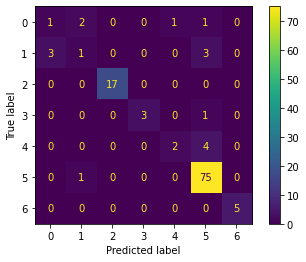

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))